# **ANOVA**

## **Penjelasan ANOVA**

**ANOVA** (Analysis of Variance) adalah metode statistik untuk menguji apakah terdapat perbedaan yang signifikan antara rata-rata dua atau lebih kelompok. ANOVA membandingkan variansi antar-kelompok dengan variansi dalam-kelompok.

**Hipotesis dalam ANOVA:**
- H0 (hipotesis nol): Semua rata-rata populasi adalah sama
- H1 (hipotesis alternatif): Setidaknya ada satu rata-rata populasi yang berbeda

**Asumsi dasar ANOVA:**
- Data tiap kelompok berdistribusi normal
- Homogenitas variansi (varian sama di tiap kelompok)
- Observasi independen satu sama lain

## **ANOVA Satu Arah** 

**ANOVA satu arah** digunakan ketika kita ingin menguji pengaruh satu faktor kategorikal terhadap sebuah variabel numerik.

**Contoh**

Apakah jenis metode belajar memengaruhi nilai ujian siswa?

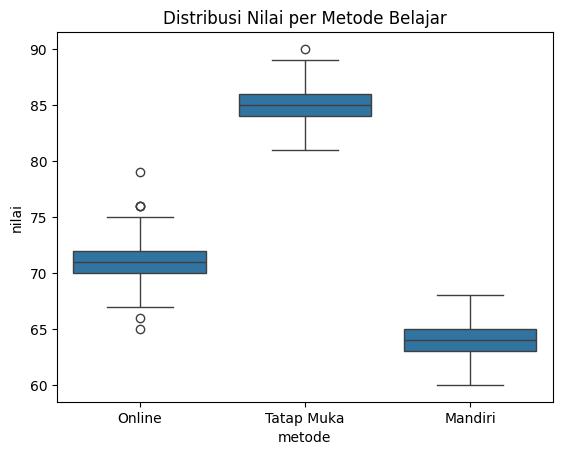

Statistik Deskriptif:
             count       mean       std   min   25%   50%   75%   max
metode                                                              
Mandiri     333.0  64.108108  1.511112  60.0  63.0  64.0  65.0  68.0
Online      334.0  71.062874  1.954190  65.0  70.0  71.0  72.0  79.0
Tatap Muka  333.0  84.957958  1.514400  81.0  84.0  85.0  86.0  90.0

Uji ANOVA:
                sum_sq     df             F  PR(>F)
C(metode)  75058.92484    2.0  13405.304274     0.0
Residual    2791.19916  997.0           NaN     NaN


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

data_1a = pd.read_csv("../datasets/satu_arah.csv")

sns.boxplot(x="metode", y="nilai", data=data_1a)
plt.title("Distribusi Nilai per Metode Belajar")
plt.show()

# Statistik Deskriptif
print("Statistik Deskriptif:\n", data_1a.groupby('metode')['nilai'].describe())

print("\nUji ANOVA:")
model_1a = ols('nilai ~ C(metode)', data=data_1a).fit()
anova_1a = sm.stats.anova_lm(model_1a, typ=2)
print(anova_1a)

**Interpretasi:**
- Nilai F-statistik yang sangat tinggi (13,405.30) menunjukkan bahwa variasi antar kelompok jauh lebih besar dibanding variasi dalam kelompok.
- p-value = 0.0 (lebih kecil dari α = 0.05) berarti kita menolak hipotesis nol (H₀).
  
Terdapat perbedaan yang signifikan antara rata-rata nilai pada ketiga metode belajar (Mandiri, Online, Tatap Muka). Artinya, metode belajar memang memiliki pengaruh nyata terhadap performa nilai siswa.

## **ANOVA Dua Arah** 

## **Penjelasan ANOVA Dua Arah**

**ANOVA dua arah** digunakan untuk menguji pengaruh dua faktor kategorikal sekaligus terhadap sebuah variabel numerik, serta melihat apakah terdapat interaksi antara kedua faktor tersebut. Dengan ANOVA dua arah, kita dapat mengetahui:
- Apakah faktor pertama berpengaruh signifikan terhadap variabel numerik.
- Apakah faktor kedua berpengaruh signifikan terhadap variabel numerik.
- Apakah terdapat interaksi antara kedua faktor yang memengaruhi variabel numerik.

**Contoh :**

Apakah jenis metode belajar memengaruhi nilai ujian siswa setelah mempertimbangkan waktu belajar?

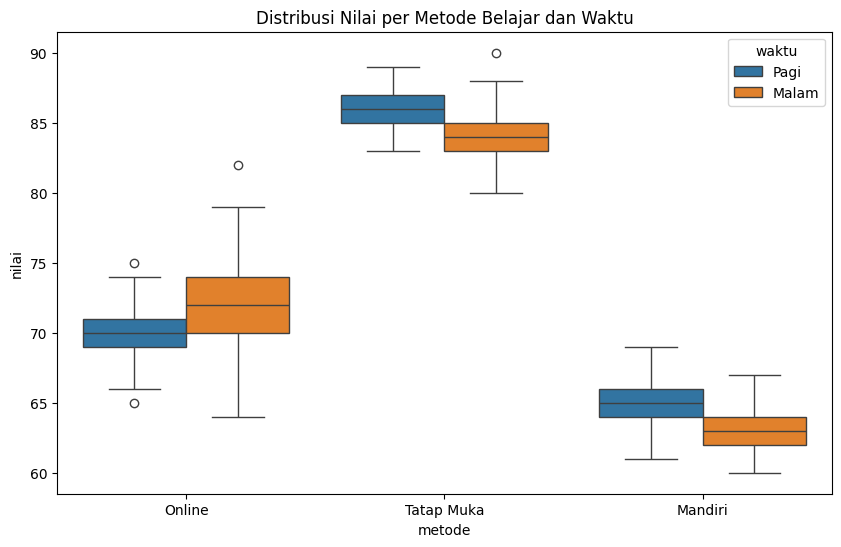

Statistik Deskriptif:
                   count       mean       std   min   25%   50%   75%   max
metode     waktu                                                          
Mandiri    Malam  150.0  63.293333  1.624257  60.0  62.0  63.0  64.0  67.0
           Pagi   150.0  64.946667  1.621113  61.0  64.0  65.0  66.0  69.0
Online     Malam  150.0  72.160000  2.601187  64.0  70.0  72.0  74.0  82.0
           Pagi   150.0  69.880000  1.927964  65.0  69.0  70.0  71.0  75.0
Tatap Muka Malam  150.0  83.820000  1.802571  80.0  83.0  84.0  85.0  90.0
           Pagi   150.0  86.073333  1.424129  83.0  85.0  86.0  87.0  89.0

Uji ANOVA Dua Arah (dengan interaksi):
                          sum_sq     df            F        PR(>F)
C(metode)           67531.208889    2.0  9634.998523  0.000000e+00
C(waktu)               66.151111    1.0    18.876187  1.554702e-05
C(metode):C(waktu)    909.555556    2.0   129.770614  3.304196e-50
Residual             3133.000000  894.0          NaN           NaN

U

In [2]:
# Load the data for two-way ANOVA
data_2a = pd.read_csv("../datasets/dua_arah.csv")

# Boxplot untuk melihat distribusi nilai berdasarkan kedua faktor
plt.figure(figsize=(10, 6))
sns.boxplot(x="metode", y="nilai", hue="waktu", data=data_2a)
plt.title("Distribusi Nilai per Metode Belajar dan Waktu")
plt.show()

# Statistik Deskriptif
print("Statistik Deskriptif:\n", data_2a.groupby(['metode', 'waktu'])['nilai'].describe())

print("\nUji ANOVA Dua Arah (dengan interaksi):")
model_2a = ols('nilai ~ C(metode) * C(waktu)', data=data_2a).fit()
anova_2a = sm.stats.anova_lm(model_2a, typ=2)
print(anova_2a)

print("\nUji ANOVA Dua Arah (tanpa interaksi):")
model_2a_no_interaksi = ols('nilai ~ C(metode) + C(waktu)', data=data_2a).fit()
anova_2a_no_interaksi = sm.stats.anova_lm(model_2a_no_interaksi, typ=2)
print(anova_2a_no_interaksi)

**Statistik Deskriptif:**

Dari statistik deskriptif, kita dapat melihat rata-rata nilai untuk setiap kombinasi metode belajar dan waktu:

* **Mandiri:** Rata-rata nilai lebih tinggi pada pagi hari (64.95) dibandingkan malam hari (63.29).
* **Online:** Rata-rata nilai lebih tinggi pada malam hari (72.16) dibandingkan pagi hari (69.88).
* **Tatap Muka:** Rata-rata nilai lebih tinggi pada pagi hari (86.07) dibandingkan malam hari (83.82).
* Secara keseluruhan, metode **Tatap Muka** memiliki rata-rata nilai tertinggi, diikuti oleh **Online**, dan kemudian **Mandiri**.
* Perbedaan rata-rata nilai antara pagi dan malam terlihat berbeda-beda tergantung pada metode belajarnya.

**Uji ANOVA Dua Arah (dengan interaksi):**

Hasil ANOVA dengan interaksi menunjukkan:

* **Efek Utama Metode [C(metode)]:** P-value sangat kecil (0.000), yang berarti **ada perbedaan signifikan** dalam nilai ujian siswa berdasarkan jenis metode belajar.
* **Efek Utama Waktu [C(waktu)]:** P-value sangat kecil (1.55e-05), yang berarti **ada perbedaan signifikan** dalam nilai ujian siswa antara waktu belajar pagi dan malam.
* **Efek Interaksi Metode dan Waktu [C(metode):C(waktu)]:** P-value sangat kecil (3.30e-50), yang berarti **ada interaksi yang signifikan** antara jenis metode belajar dan waktu belajar dalam memengaruhi nilai ujian siswa. Ini mengindikasikan bahwa efek dari metode belajar terhadap nilai ujian berbeda tergantung pada waktu belajarnya (dan sebaliknya).

Karena terdapat interaksi yang signifikan, fokus interpretasi sebaiknya tertuju pada bagaimana kombinasi metode dan waktu memengaruhi nilai. Misalnya, efektivitas metode Tatap Muka mungkin lebih tinggi di pagi hari, sementara metode Online mungkin lebih efektif di malam hari.

**Uji ANOVA Dua Arah (tanpa interaksi):**

Hasil ANOVA tanpa interaksi menunjukkan:

* **Efek Utama Metode [C(metode)]:** P-value sangat kecil (0.000), yang berarti **ada perbedaan signifikan** dalam nilai ujian siswa berdasarkan jenis metode belajar, bahkan tanpa mempertimbangkan interaksi dengan waktu.
* **Efek Utama Waktu [C(waktu)]:** P-value sangat kecil (0.000138), yang berarti **ada perbedaan signifikan** dalam nilai ujian siswa antara waktu belajar pagi dan malam, bahkan tanpa mempertimbangkan interaksi dengan metode.
